# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [6]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00120697021484375 (+/- 0.00040988453378211596)
avg score time: 0.0005950450897216797 (+/- 0.000486018069383018)
avg test score: 0.522 (+/- 0.4397526577520595)


In [7]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01516566276550293 (+/- 0.0009819136377617256)
avg score time: 0.006416988372802734 (+/- 0.008858591252100069)
avg test score: nan (+/- nan)


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 720, in predict_proba
    all_pro

##### 와인 데이터

In [8]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [9]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0011909008026123047 (+/- 0.0003899184067762099)
avg score time: 0.0006031036376953125 (+/- 0.000492699700001522)
avg test score: 0.2833079963514746 (+/- 0.3484717614319225)


In [10]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 720, in predict_proba
    all_pro

avg fit time: 0.01594882011413574 (+/- 0.0010917892014648011)
avg score time: 0.0021982192993164062 (+/- 0.0004097199523175423)
avg test score: nan (+/- nan)


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 720, in predict_proba
    all_pro

##### 유방암 데이터

In [11]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [12]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0007920265197753906 (+/- 0.0003961564717409545)
avg score time: 0.01010432243347168 (+/- 0.017719116173452336)
avg test score: 0.8599944875385843 (+/- 0.03865048644951847)


In [13]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 720, in predict_proba
    all_pro

avg fit time: 0.017353343963623046 (+/- 0.0010167282121299347)
avg score time: 0.00299220085144043 (+/- 5.519789172549355e-07)
avg test score: nan (+/- nan)


C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 677, in predict
    predicted_probabilitiy = self.predict_proba(X)
  File "C:\Users\2020 M\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 720, in predict_proba
    all_pro

#### SVC

##### 붓꽃 데이터

In [14]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [15]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001396322250366211 (+/- 0.0007982730936686502)
avg score time: 0.0009972572326660157 (+/- 4.370284743266907e-07)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [16]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01975846290588379 (+/- 0.00040559792221496623)
avg score time: 0.0031848430633544924 (+/- 0.00040324614405337986)
avg test score: 0.9400000000000001 (+/- 0.038873012632301994)


##### 와인 데이터

In [17]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [18]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002000856399536133 (+/- 0.0008980249577449377)
avg score time: 0.00040268898010253906 (+/- 0.000493225429704387)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [19]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.020745563507080077 (+/- 0.0007483416398176859)
avg score time: 0.0035904884338378907 (+/- 0.0004878635501160244)
avg test score: 0.9609523809523809 (+/- 0.028267341226138717)


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [21]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.003991603851318359 (+/- 1.0284660121568993e-05)
avg score time: 0.0014014244079589844 (+/- 0.00048248720197319016)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [22]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02853403091430664 (+/- 0.001352684138436391)
avg score time: 0.009974288940429687 (+/- 1.7589022649228674e-05)
avg test score: 0.968390001552554 (+/- 0.015265987557220655)


#### Decision Tree

##### 붓꽃 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [24]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0011966228485107422 (+/- 0.0003988671715439367)
avg score time: 0.0003991127014160156 (+/- 0.0004888116062914885)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [25]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0010082244873046875 (+/- 0.0006309711439798601)
avg score time: 0.00039424896240234373 (+/- 0.00048291325302982503)
avg test score: 0.9600000000000002 (+/- 0.03265986323710903)


##### 와인 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [27]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0009991645812988282 (+/- 1.5034668792664995e-05)
avg score time: 0.000995492935180664 (+/- 2.8394842016142664e-06)
avg test score: 0.8765079365079365 (+/- 0.03321445165041705)


In [28]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.018154668807983398 (+/- 0.0009871799437935812)
avg score time: 0.0019972801208496095 (+/- 3.032324427716188e-06)
avg test score: 0.9609523809523809 (+/- 0.028267341226138717)


##### 유방암 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [30]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005986547470092774 (+/- 1.8199694377617518e-05)
avg score time: 0.00039806365966796873 (+/- 0.0004875275683009058)
avg test score: 0.9191274646793974 (+/- 0.018878213359305104)


In [31]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02534494400024414 (+/- 0.0007913331459493278)
avg score time: 0.0019905567169189453 (+/- 1.210358868633904e-05)
avg test score: 0.943766495885732 (+/- 0.020444347352344395)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [32]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [33]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [34]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0024453163146972655 (+/- 0.0013413527881952724)
avg score time: 0.002001237869262695 (+/- 0.0006274290370046633)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [35]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.015364551544189453 (+/- 0.0010152367538562258)
avg score time: 0.00718073844909668 (+/- 0.0003847961057725269)
avg test score: 0.4848731884545838 (+/- 0.12176520791113705)


##### 당뇨병 데이터

In [36]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [37]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0014030933380126953 (+/- 0.00048423077541741007)
avg score time: 0.001395845413208008 (+/- 0.00048587339959435473)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [38]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.014762449264526366 (+/- 0.0007454130913753129)
avg score time: 0.0071846961975097655 (+/- 0.00040891741487352054)
avg test score: 0.4062151111439939 (+/- 0.08202507823702035)


#### SVR

##### 보스턴 주택 가격 데이터

In [39]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [40]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.009575319290161134 (+/- 0.00048711961257957295)
avg score time: 0.003987789154052734 (+/- 1.5597750886722684e-06)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [41]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03543663024902344 (+/- 0.0009203841730209619)
avg score time: 0.019353389739990234 (+/- 0.0004824896760465556)
avg test score: 0.14535031032088266 (+/- 0.3643498664171372)


##### 당뇨병 데이터

In [42]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [43]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.007169198989868164 (+/- 0.0004046968229626889)
avg score time: 0.0032027721405029296 (+/- 0.00040744371039790414)
avg test score: 0.14659936199629428 (+/- 0.021907980033429305)


In [44]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02992086410522461 (+/- 0.0006456796373179175)
avg score time: 0.015564298629760743 (+/- 0.0004943353041731612)
avg test score: 0.06693854911979195 (+/- 0.034810473748392655)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [45]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [46]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0031890392303466795 (+/- 0.00038493866206640065)
avg score time: 0.00019965171813964843 (+/- 0.00039930343627929686)
avg test score: 0.0900527180780255 (+/- 0.9786396374730755)


In [47]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.021749401092529298 (+/- 0.0007417465178928477)
avg score time: 0.0017946243286132812 (+/- 0.00039937722135051205)
avg test score: 0.48472926980873837 (+/- 0.22532466049680125)


##### 당뇨병 데이터

In [48]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [49]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0025879383087158204 (+/- 0.000502016044311698)
avg score time: 0.0005985736846923828 (+/- 0.0007981777404811589)
avg test score: -0.11808926029780065 (+/- 0.13091291293413765)


In [50]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.020742464065551757 (+/- 0.0011584637060898114)
avg score time: 0.0017973423004150391 (+/- 0.0007377600349299915)
avg test score: 0.39350080614420085 (+/- 0.022430657868841616)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [51]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [52]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [53]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09006714820861816 (+/- 0.0018952139068081038)
avg score time: 0.006989192962646484 (+/- 1.3881940962457552e-05)
avg test score: 0.96 (+/- 0.024944382578492935)


In [54]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09427032470703126 (+/- 0.0014436488783436678)
avg score time: 0.00718073844909668 (+/- 0.0003988504516678635)
avg test score: 0.9776190476190475 (+/- 0.020831783767013237)


In [55]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1318502426147461 (+/- 0.0007537164366886055)
avg score time: 0.007781982421875 (+/- 0.0004003208542283769)
avg test score: 0.9613414066138798 (+/- 0.021188408593400723)


### Random Forests 회귀

In [56]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [57]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.19887423515319824 (+/- 0.0019513210041327777)
avg score time: 0.006580877304077149 (+/- 0.0005020436672116235)
avg test score: 0.6129817557885099 (+/- 0.2296087168415705)


In [58]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16633787155151367 (+/- 0.00184281831269879)
avg score time: 0.006577396392822265 (+/- 0.0004847691418885242)
avg test score: 0.42526010476314935 (+/- 0.0501811313228912)


### Extremely Randomized Trees 분류

In [59]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [60]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06642780303955079 (+/- 0.002327250857893032)
avg score time: 0.007773637771606445 (+/- 0.0007523415583011764)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [61]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07102665901184083 (+/- 0.0014742414111558284)
avg score time: 0.0077670574188232425 (+/- 0.00039588560714493525)
avg test score: 0.9665079365079364 (+/- 0.020746948644437477)


In [62]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08078474998474121 (+/- 0.0017997269062795427)
avg score time: 0.007784080505371094 (+/- 0.0004025701033421691)
avg test score: 0.9666200900481291 (+/- 0.011609532962591908)


### Extremely Randomized Trees 회귀

In [63]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [64]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13564391136169435 (+/- 0.002822110973746965)
avg score time: 0.006776332855224609 (+/- 0.0003963054696214769)
avg test score: 0.6586708466473583 (+/- 0.2110359344103442)


In [65]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12525973320007325 (+/- 0.010667639808215968)
avg score time: 0.006985950469970703 (+/- 1.1738719788188847e-05)
avg test score: 0.4456014654934089 (+/- 0.04006042033853565)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [66]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [67]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [68]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None), 
         RandomForestClassifier(n_estimators=n_estimators),
         ExtraTreesClassifier(n_estimators=n_estimators)]

<ipython-input-69-4aebf8a412c1>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, plot_idx)
<ipython-input-69-4aebf8a412c1>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, plot_idx)
<ipython-input-69-4aebf8a412c1>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

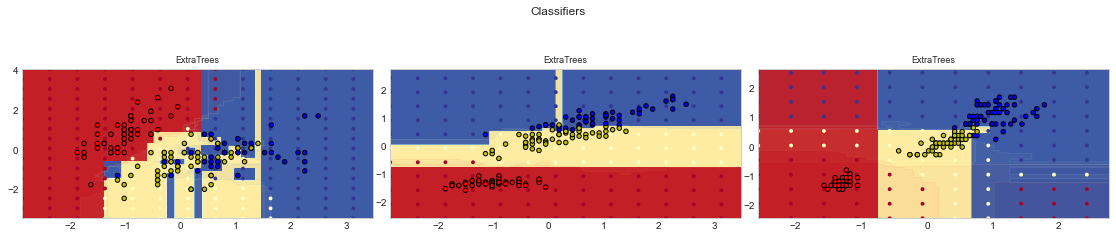

In [69]:
plt.figure(figsize=(16, 8))

for pair in ([0, 1], [0, 2], [2, 3]):
    
    for model in models:
        
        X = iris.data[:, pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std
        
        model.fit(X, y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
                             
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
            
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                          yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                           c=Z_points_coarser, cmap=cmap,
                           edgecolors='none')
    plt.scatter(X[:, 0], X[:, 1], c=y,
               cmap=ListedColormap(['r', 'y', 'b']),
               edgecolor='k', s=20)
    plot_idx += 1
    
plt.suptitle("Classifiers", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In [72]:
plot_idx = 1
models =[DecisionTreeRegressor(max_depth=None),
        RandomForestRegressor(n_estimators=n_estimators),
        ExtraTreesRegressor(n_estimators=n_estimators)]

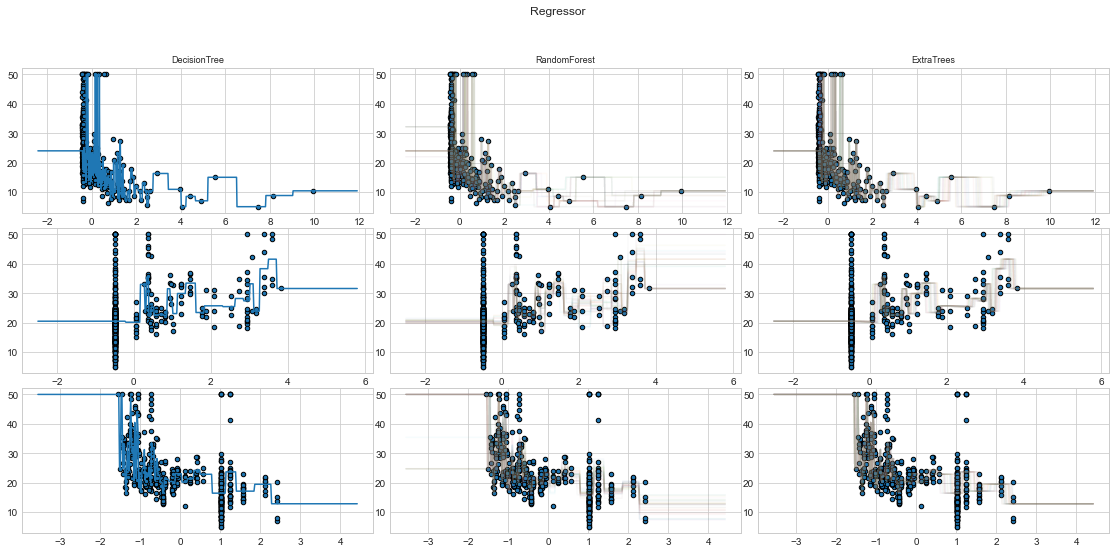

In [73]:
plt.figure(figsize=(16, 8))

for pair in (0, 1, 2):
    
    for model in models:
        
        X = boston.data[:, pair]
        y = boston.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis=0)
        std = X.std(axis=0)    
        X = (X - mean) / std
        
        model.fit(X.reshape(-1, 1), y)
        
        model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <=len(models):
            plt.title(model_title, fontsize=9)
            
        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = y.min()-1, y.max()+1
        xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)
                
        plt.scatter(X, y, edgecolors='k', s=20)
        plot_idx += 1
        
plt.suptitle("Regressor", fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [77]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [78]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.049260950088500975 (+/- 0.003015898433842351)
avg score time: 0.005592155456542969 (+/- 0.0004946772983310309)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [79]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05326886177062988 (+/- 0.0004927634685302968)
avg score time: 0.00577545166015625 (+/- 0.00039304932322460693)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [80]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09994850158691407 (+/- 0.001167464649455429)
avg score time: 0.006583404541015625 (+/- 0.0004898560078466244)
avg test score: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [81]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [82]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06427907943725586 (+/- 0.0013123998469407004)
avg score time: 0.003589344024658203 (+/- 0.00048809265335258636)
avg test score: 0.5985744583807469 (+/- 0.20937548598257683)


In [83]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0556884765625 (+/- 0.008910069116886724)
avg score time: 0.0027927398681640626 (+/- 0.00040119426472036277)
avg test score: 0.41312084500745616 (+/- 0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [85]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [86]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14490628242492676 (+/- 0.0005709695401688162)
avg score time: 0.0007979869842529297 (+/- 0.0003990060112205531)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [87]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2175478458404541 (+/- 0.006143636647984179)
avg score time: 0.000597381591796875 (+/- 0.0004877639662380707)
avg test score: 0.9330158730158731 (+/- 0.04127777701479872)


In [88]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2725778579711914 (+/- 0.0029249083758524394)
avg score time: 0.00059814453125 (+/- 0.0004883830189820749)
avg test score: 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [89]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)    

In [90]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07770123481750488 (+/- 0.002285800576554367)
avg score time: 0.0007972240447998047 (+/- 0.00039861810795238596)
avg test score: 0.6752372690883461 (+/- 0.16121836382662494)


In [91]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05996580123901367 (+/- 0.0010653346709223477)
avg score time: 0.0003989219665527344 (+/- 0.0004885776558898482)
avg test score: 0.4029450867301339 (+/- 0.0688801507855847)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [95]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [96]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)

In [97]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [98]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'soft',
    weights=[2, 1, 2]
)

In [99]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [101]:
X = iris.data[:, [0, 2]]
y = iris.target

In [102]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                             voting='soft', weights=[2, 1, 2])
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [104]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

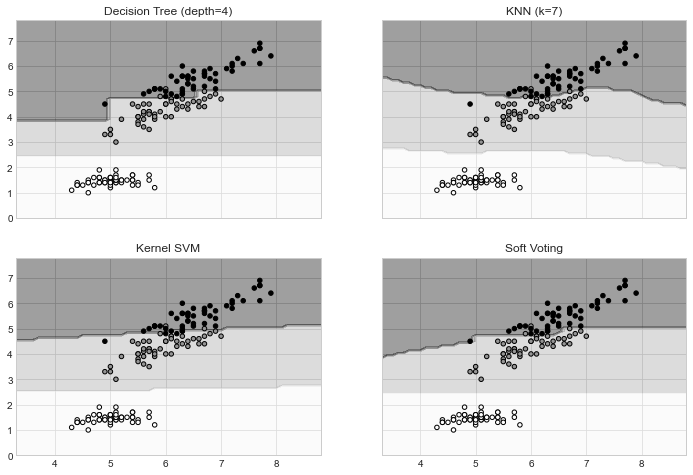

In [105]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                                 [model1, model2, model3, vote_model],
                                 ['Decision Tree (depth=4)', 'KNN (k=7)',
                                 'Kernel SVM', 'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [114]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]
)

In [115]:
for model in (model1, model2, model3 , vote_model):
    model_name = str(type(model)).split('.')[:-1][:-2]
    scores = cross_val_score(model, boston.data, boston.target, cv=5)
    print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [["<class 'sklearn"]]
R2: 0.67 (+/- 0.16) [["<class 'sklearn"]]
R2: 0.63 (+/- 0.20) [["<class 'sklearn"]]
R2: 0.66 (+/- 0.20) [["<class 'sklearn"]]


### 회귀식 시각화

In [116]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [117]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [118]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

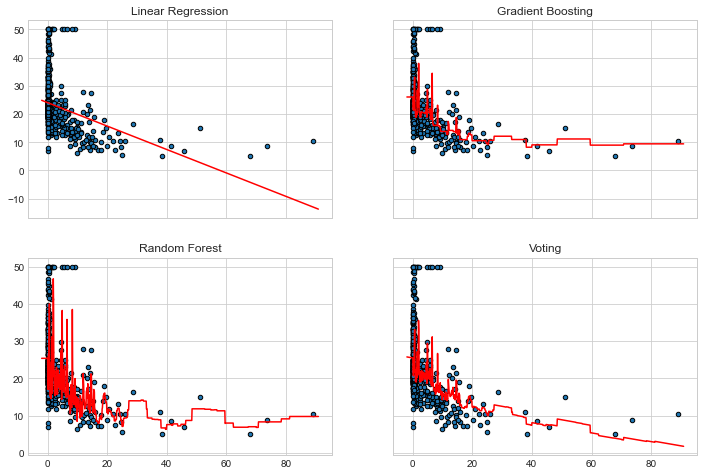

In [119]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                         [model1, model2, model3, vote_model],
                         ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
    Z = model.predict(xx.reshape(-1, 1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolors='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [130]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [131]:
estimators = [('ridge', Ridge()),
             ('lasso', Lasso()),
             ('svr', SVR())]

In [132]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [137]:
cross_val = cross_validate(
    estimator=reg,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10212187767028809 (+/- 0.003909042676661816)
avg score time: 0.004188680648803711 (+/- 0.00039892202354976095)
avg test score: 0.3291483240782266 (+/- 0.32935020932314446)


#### 회귀식 시각화

In [134]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [135]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

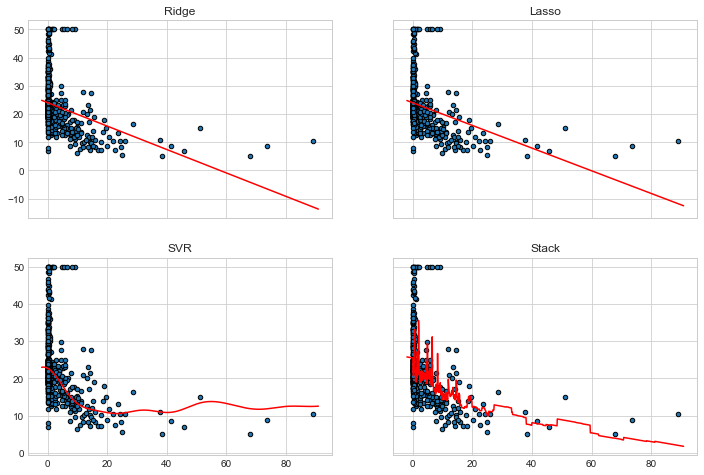

In [136]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                         [model1, model2, model3, vote_model],
                         ['Ridge', 'Lasso', 'SVR', 'Stack']):
    Z = model.predict(xx.reshape(-1, 1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolors='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

### 스택 분류

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [142]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('naive', GaussianNB())]

In [143]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [144]:
cross_val = cross_validate(
    estimator=clf,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2300022602081299 (+/- 0.008061709121993893)
avg score time: 0.007781076431274414 (+/- 0.0003981042984222502)
avg test score: 0.9733333333333334 (+/- 0.02494438257849294)


#### 결정 경계 시각화

In [146]:
X = iris.data[:, [0, 2]]
y = iris.target

In [147]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [148]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

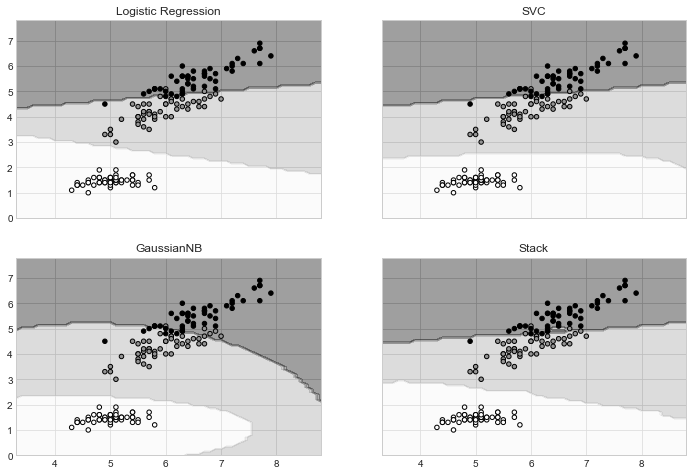

In [149]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                                 [model1, model2, model3, stack],
                                 ['Logistic Regression', 'SVC',
                                 'GaussianNB', 'Stack']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()